# Medical Cost Predictor

## Project Overview
This project aims to build a machine learning model to estimate medical costs based on user details such as age, gender, and health conditions.

### Objectives:
1. Predict **estimated medical costs** for a user based on input data.
2. Provide a list of **similar cases** stored in a database for comparison.

### Key Components:
1. **Data Source:**
   - We use the `MEPS HC 243 2022 FULL YEAR CONSOLIDATED DATA`, a comprehensive dataset on healthcare expenditures, demographics, and conditions.
   - The dataset is accessed from Google Drive in `.xlsx` format.

2. **Workflow:**
   - Data is preprocessed to handle missing values and encode categorical variables.
   - A **Random Forest Regressor** is trained to predict medical costs.
   - Predictions are made on user-provided input data.

3. **Backend Integration:**
   - SQL/ORM is used to fetch similar cases for comparison (not demonstrated here but implemented separately).
   - The predictive model is independent of the SQL instance and relies on the Google Drive dataset.

### Tools and Libraries:
- **Pandas, NumPy:** Data handling and preprocessing.
- **Scikit-learn:** Machine learning and evaluation.
- **Joblib:** Saving and loading the trained model.
- **Google Colab:** Environment for building and testing the model.

## Data Loading
The dataset used for this project is the **MEPS HC 243 2022 FULL YEAR CONSOLIDATED DATA**, stored in Google Drive in `.xlsx` format.

We will:
1. Mount Google Drive to access the file.
2. Load the dataset into a Pandas DataFrame.
3. Inspect the dataset to understand its structure and contents.

In [41]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the dataset in Google Drive
dataset_path = '/content/drive/My Drive/dataset.xlsx'

# Load the dataset in chunks to preview the structure (limit to first 5 rows)
import pandas as pd

# Load only a small portion of the dataset
data = pd.read_excel(dataset_path, nrows=5)  # Load first 5 rows for preview

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data)

# Display column names and their count
print("\nNumber of Variables (Columns):", len(data.columns))
print("\nVariable Names:")
print(data.columns.tolist())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Preview:
      DUID  PID    DUPERSID  PANEL  DATAYEAR FAMID31 FAMID42 FAMID53 FAMID22  \
0  2460002  101  2460002101     24      2022       A       A       A       A   
1  2460006  101  2460006101     24      2022       A       A       A       A   
2  2460006  102  2460006102     24      2022       A       A       A       A   
3  2460010  101  2460010101     24      2022       A       A       A       A   
4  2460018  101  2460018101     24      2022       A       A       A       A   

  FAMIDYR  ... RXOSR22  RXPTR22  RXOTH22      PERWT22F      FAMWT22F  \
0       A  ...       0        0        0   5728.309495   5232.211986   
1       A  ...       0        0        0  15648.881461  16017.881691   
2       A  ...       0        0        0  14123.720178  16017.881691   
3       A  ...       0     5288      299  16982.054917  21905.758877   
4       A  ..

## Column Selection
The dataset contains 1,420 variables. For our analysis and model building, we will only work with the selected variables based on the project requirements.

By specifying the column names during data loading, we reduce memory usage and improve processing speed.

In [42]:
# List of selected columns from the document
selected_columns = [
    'REGION22', 'AGELAST', 'SEX', 'RACEV2X', 'MARRY22X', 'BORNUSA',
    'HIBPDX', 'HIBPAGED', 'CHDDX', 'CHDAGED', 'ANGIDX', 'ANGIAGED',
    'MIDX', 'OHRTDX', 'OHRTAGED', 'OHRTTYPE', 'STRKDX', 'STRKAGED',
    'EMPHDX', 'EMPHAGED', 'CHBRON31', 'CHOLDX', 'CHOLAGED', 'CANCERDX',
    'CABLADDR', 'CABREAST', 'CACERVIX', 'CACOLON', 'CALUNG', 'CALYMPH',
    'CAMELANO', 'CAOTHER', 'CAPROSTA', 'CASKINNM', 'CASKINDK', 'CAUTERUS',
    'DIABDX_M18', 'DIABAGED', 'JTPAIN31_M18', 'ARTHDX', 'ARTHTYPE',
    'ARTHAGED', 'ASTHDX', 'ASTHAGED', 'ASATAK31', 'ADHDADDX', 'ADHDAGED',
    'COVIDEVER53', 'COVID12MO53', 'WLKLIM31', 'OFTSMK53', 'COVAXEVR53',
    'ADASKALC42', 'ADBMI42', 'HAVEUS42', 'PRACTP42', 'YNOUSC42_M18',
    'PROVTY42_M18', 'PLCTYP42', 'TYPEPE42', 'LOCATN42', 'AFRDCA42',
    'EMPST31', 'CHOIC31', 'INDCAT31', 'POVCAT22', 'UNINS22', 'INSCOV22',
    'INSURC22', 'TOTEXP22', 'TOTSLF22', 'TOTMCR22', 'TOTMCD22', 'TOTPRV22',
    'TOTVA22', 'TOTTRI22', 'TOTOFD22', 'TOTSTL22', 'TOTWCP22', 'TOTOSR22',
    'TOTPTR22', 'TOTOTH22', 'IPTEXP22', 'RXEXP22'
]

# Filter the dataset to include only the selected columns
filtered_data = data[selected_columns]

# Display the first few rows of the filtered dataset
print("Filtered Dataset Preview:")
print(filtered_data.head())

# Display the shape of the filtered dataset
print(f"\nFiltered Dataset Shape: {filtered_data.shape}")

Filtered Dataset Preview:
   REGION22  AGELAST  SEX  RACEV2X  MARRY22X  BORNUSA  HIBPDX  HIBPAGED  \
0         2       77    2        2         2        1       1        25   
1         2       64    2        1         3        2       1        39   
2         2       67    1        1         3        2       2        -1   
3         4       29    1       12         5        1       2        -1   
4         1       51    2        1         3        1       2        -1   

   CHDDX  CHDAGED  ...  TOTVA22  TOTTRI22  TOTOFD22  TOTSTL22  TOTWCP22  \
0      2       -1  ...        0         0         0         0         0   
1      2       -1  ...        0         0         0         0         0   
2      2       -1  ...        0         0         0         0         0   
3      2       -1  ...        0         0        40       259         0   
4      2       -1  ...        0         0         0         0         0   

   TOTOSR22  TOTPTR22  TOTOTH22  IPTEXP22  RXEXP22  
0         0        

## Renaming Variables for Clarity
To improve readability and make the dataset easier to understand, we have renamed the columns to more descriptive names.

For example:
- `AGELAST` → `Age`
- `SEX` → `Gender`
- `HIBPDX` → `Hypertension Diagnosis`

This ensures that variable names reflect their meaning, making the data processing and modeling steps more intuitive.

In [43]:
# Rename columns to more understandable names
column_rename_map = {
    'REGION22': 'Region',
    'AGELAST': 'Age',
    'SEX': 'Gender',
    'RACEV2X': 'Race',
    'MARRY22X': 'Marital Status',
    'BORNUSA': 'Born in USA',
    'HIBPDX': 'Hypertension Diagnosis',
    'HIBPAGED': 'Age of Hypertension Diagnosis',
    'CHDDX': 'Coronary Heart Disease Diagnosis',
    'CHDAGED': 'Age of Coronary Disease Diagnosis',
    'ANGIDX': 'Angina Diagnosis',
    'ANGIAGED': 'Age of Angina Diagnosis',
    'MIDX': 'Heart Attack Diagnosis',
    'OHRTDX': 'Other Heart Disease Diagnosis',
    'OHRTAGED': 'Age of Other Heart Disease Diagnosis',
    'OHRTTYPE': 'Type of Other Heart Disease',
    'STRKDX': 'Stroke Diagnosis',
    'STRKAGED': 'Age of Stroke Diagnosis',
    'EMPHDX': 'Emphysema Diagnosis',
    'EMPHAGED': 'Age of Emphysema Diagnosis',
    'CHBRON31': 'Chronic Bronchitis Diagnosis',
    'CHOLDX': 'High Cholesterol Diagnosis',
    'CHOLAGED': 'Age of High Cholesterol Diagnosis',
    'CANCERDX': 'Any Cancer Diagnosis',
    'CABLADDR': 'Bladder Cancer Diagnosis',
    'CABREAST': 'Breast Cancer Diagnosis',
    'CACERVIX': 'Cervical Cancer Diagnosis',
    'CACOLON': 'Colon Cancer Diagnosis',
    'CALUNG': 'Lung Cancer Diagnosis',
    'CALYMPH': 'Lymphoma Diagnosis',
    'CAMELANO': 'Melanoma Diagnosis',
    'CAOTHER': 'Other Cancer Diagnosis',
    'CAPROSTA': 'Prostate Cancer Diagnosis',
    'CASKINNM': 'Non-Melanoma Skin Cancer Diagnosis',
    'CASKINDK': 'Skin Cancer, Type Unknown',
    'CAUTERUS': 'Uterine Cancer Diagnosis',
    'DIABDX_M18': 'Diabetes Diagnosis',
    'DIABAGED': 'Age of Diabetes Diagnosis',
    'JTPAIN31_M18': 'Joint Pain Diagnosis',
    'ARTHDX': 'Arthritis Diagnosis',
    'ARTHTYPE': 'Arthritis Type',
    'ARTHAGED': 'Age of Arthritis Diagnosis',
    'ASTHDX': 'Asthma Diagnosis',
    'ASTHAGED': 'Age of Asthma Diagnosis',
    'ASATAK31': 'Asthma Attack',
    'ADHDADDX': 'ADHD Diagnosis',
    'ADHDAGED': 'Age of ADHD Diagnosis',
    'COVIDEVER53': 'Ever Diagnosed with COVID-19',
    'COVID12MO53': 'COVID-19 Diagnosis in Past 12 Months',
    'WLKLIM31': 'Walking Limitation',
    'OFTSMK53': 'Smoking Status',
    'COVAXEVR53': 'Ever Received COVID-19 Vaccine',
    'ADASKALC42': 'Alcohol Consumption Status',
    'ADBMI42': 'Body Mass Index (BMI)',
    'HAVEUS42': 'Has Usual Source of Care',
    'PRACTP42': 'Primary Care Provider Type',
    'YNOUSC42_M18': 'Reasons for No Usual Source of Care',
    'PROVTY42_M18': 'Provider Type for Usual Care',
    'PLCTYP42': 'Place of Usual Care',
    'TYPEPE42': 'Type of Care Provided',
    'LOCATN42': 'Location of Care Facility',
    'AFRDCA42': 'African-American Care Facility',
    'EMPST31': 'Employment Status',
    'CHOIC31': 'Health Insurance Choice',
    'INDCAT31': 'Industry Category',
    'POVCAT22': 'Poverty Category',
    'UNINS22': 'Uninsured Status',
    'INSCOV22': 'Insurance Coverage Status',
    'INSURC22': 'Insurance Type',
    'TOTEXP22': 'Total Medical Expenditure',
    'TOTSLF22': 'Out-of-Pocket Expenditure',
    'TOTMCR22': 'Medicare Expenditure',
    'TOTMCD22': 'Medicaid Expenditure',
    'TOTPRV22': 'Private Insurance Expenditure',
    'TOTVA22': 'Veterans Affairs Expenditure',
    'TOTTRI22': 'Tricare Expenditure',
    'TOTOFD22': 'Other Federal Expenditure',
    'TOTSTL22': 'State and Local Expenditure',
    'TOTWCP22': 'Workers Compensation Expenditure',
    'TOTOSR22': 'Other State Resources Expenditure',
    'TOTPTR22': 'Patient Responsibility Expenditure',
    'TOTOTH22': 'Other Expenditure',
    'IPTEXP22': 'Inpatient Expenditure',
    'RXEXP22': 'Prescription Expenditure'
}

# Rename columns
filtered_data.rename(columns=column_rename_map, inplace=True)

# Display the updated dataset with new column names
print("Updated Dataset Preview:")
print(filtered_data.head())

# Display column names
print("\nUpdated Column Names:")
print(filtered_data.columns.tolist())

Updated Dataset Preview:
   Region  Age  Gender  Race  Marital Status  Born in USA  \
0       2   77       2     2               2            1   
1       2   64       2     1               3            2   
2       2   67       1     1               3            2   
3       4   29       1    12               5            1   
4       1   51       2     1               3            1   

   Hypertension Diagnosis  Age of Hypertension Diagnosis  \
0                       1                             25   
1                       1                             39   
2                       2                             -1   
3                       2                             -1   
4                       2                             -1   

   Coronary Heart Disease Diagnosis  Age of Coronary Disease Diagnosis  ...  \
0                                 2                                 -1  ...   
1                                 2                                 -1  ...   
2         

<ipython-input-43-a118fb190fa8>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns=column_rename_map, inplace=True)


## Handling Missing Values and Outliers

### Missing Values:
Missing values can affect the quality of our predictions. In this step:
1. We identify columns with missing values.
2. We handle missing values by dropping rows with null entries.

### Outliers:
Outliers can distort statistical summaries and model performance. Using the Interquartile Range (IQR) method:
1. We identify outliers in numerical columns.
2. Remove rows containing outliers to ensure the dataset is clean.

In [44]:
# Check for missing values
print("Missing Values Before Handling:")
print(filtered_data.isnull().sum())

# Handle missing values (example: drop rows with missing values)
filtered_data = filtered_data.dropna()

# Verify missing values are handled
print("\nMissing Values After Handling:")
print(filtered_data.isnull().sum())

# Detect and remove outliers based on IQR for numerical columns
import numpy as np

numerical_columns = ['Age', 'Body Mass Index (BMI)', 'Out-of-Pocket Expenditure', 'Total Medical Expenditure']

for col in numerical_columns:
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

print("\nOutliers handled successfully.")

Missing Values Before Handling:
Region                                0
Age                                   0
Gender                                0
Race                                  0
Marital Status                        0
                                     ..
Other State Resources Expenditure     0
Patient Responsibility Expenditure    0
Other Expenditure                     0
Inpatient Expenditure                 0
Prescription Expenditure              0
Length: 84, dtype: int64

Missing Values After Handling:
Region                                0
Age                                   0
Gender                                0
Race                                  0
Marital Status                        0
                                     ..
Other State Resources Expenditure     0
Patient Responsibility Expenditure    0
Other Expenditure                     0
Inpatient Expenditure                 0
Prescription Expenditure              0
Length: 84, dtype: int64

Outli

## Visualizations of Key Variables

To gain deeper insights into the data, we have created 12 visualizations, each highlighting a specific aspect of the dataset. These plots help us understand patterns, distributions, and relationships among the variables.

### Visualizations:
1. **Age Distribution**:
   - A histogram showing the distribution of ages in the dataset.

2. **Gender Distribution**:
   - A bar plot showing the counts for different genders.

3. **Out-of-Pocket Expenditure by Poverty Category**:
   - A boxplot illustrating how out-of-pocket expenditures vary by poverty category.

4. **BMI Distribution**:
   - A histogram showing the distribution of Body Mass Index (BMI).

5. **Smoking Status Distribution**:
   - A bar plot showing the distribution of smoking statuses.

6. **Insurance Coverage Status**:
   - A bar plot showing the counts of different insurance coverage statuses.

7. **Total Medical Expenditure by Region**:
   - A boxplot comparing total medical expenditures across regions.

8. **Hypertension Diagnosis by Gender**:
   - A grouped bar plot comparing hypertension diagnoses across genders.

9. **Diabetes Diagnosis by BMI**:
   - A boxplot showing the relationship between BMI and diabetes diagnosis.

10. **Prescription Expenditure by Age**:
   - A scatterplot showing the relationship between age and prescription expenditure.

11. **COVID-19 Diagnosis in Past 12 Months**:
   - A bar plot showing the counts of individuals diagnosed with COVID-19 in the past year.

12. **Employment Status**:
   - A bar plot showing the distribution of employment statuses.

### Grid Layout:
The visualizations are arranged in a grid layout with 3 plots per row for better readability and presentation.

<ipython-input-45-9ae64d7a5816>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x='Gender', palette='pastel', ax=axes[0, 1])
<ipython-input-45-9ae64d7a5816>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='Poverty Category', y='Out-of-Pocket Expenditure', palette='coolwarm', ax=axes[0, 2])
<ipython-input-45-9ae64d7a5816>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data, x='Smoking Status', palette='cool', ax=axes[1, 1])
<ipython-input-45-9ae64d7a5816>:39: FutureWarning: 



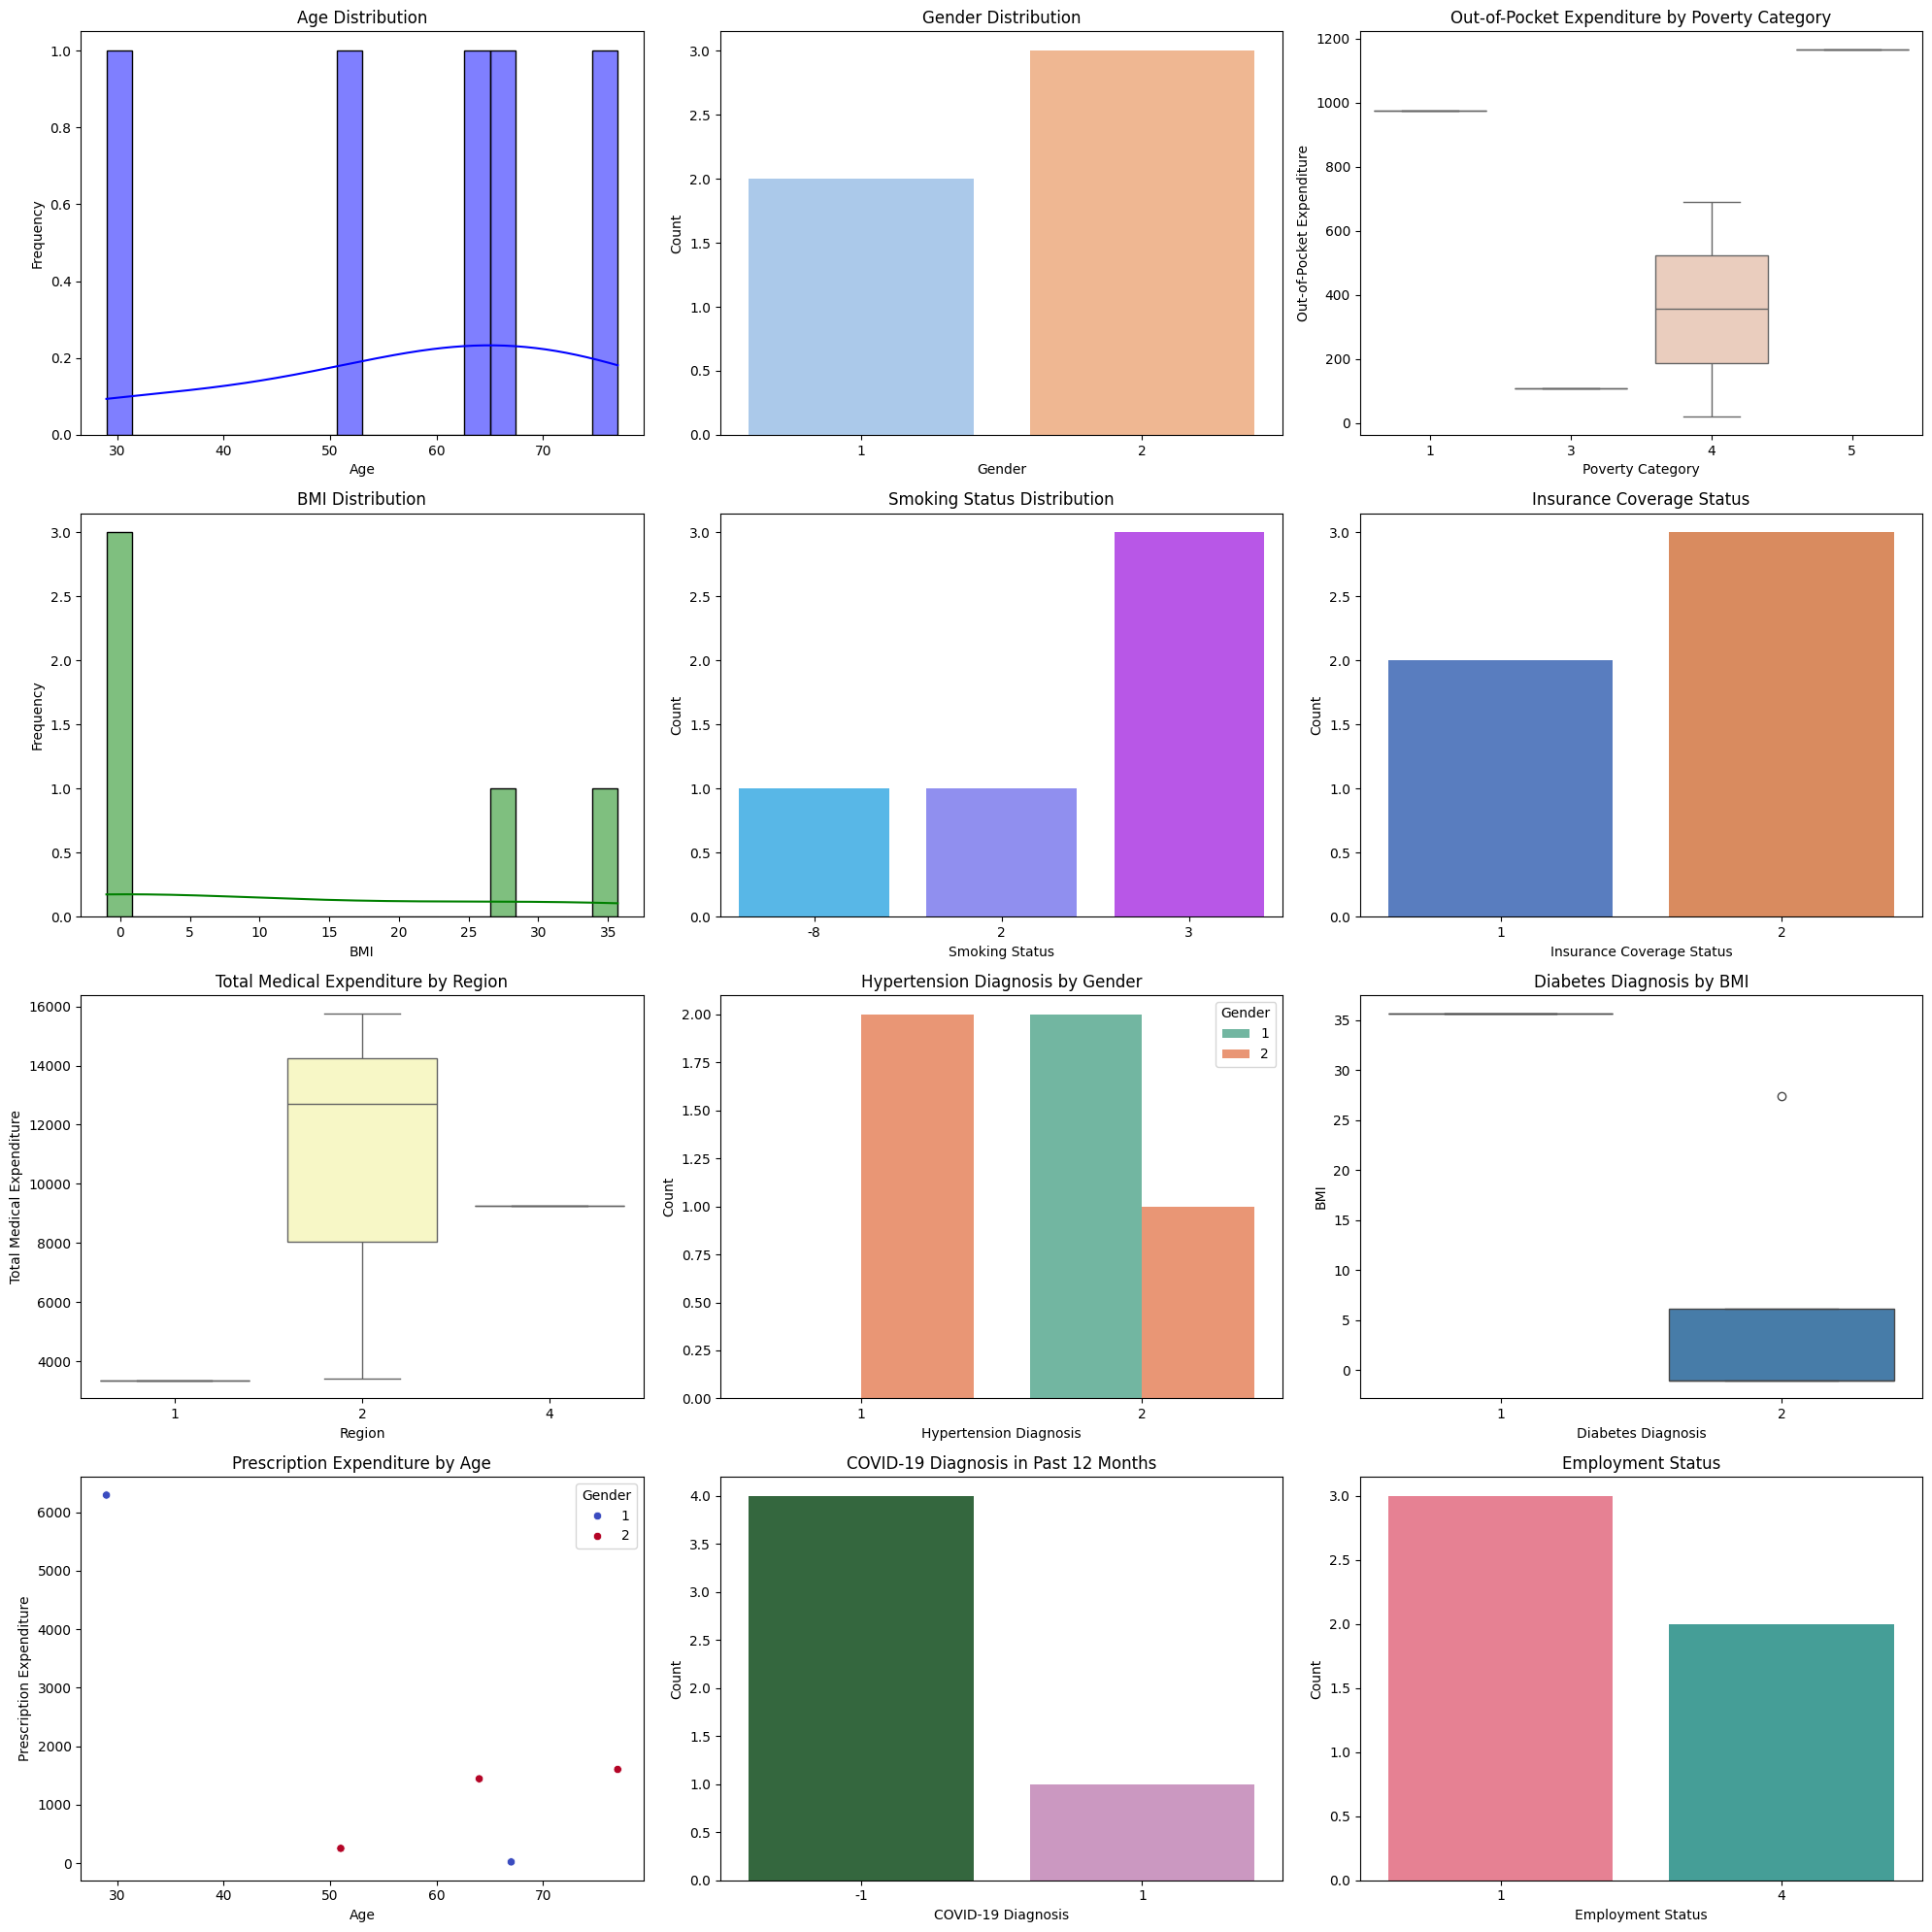

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the grid layout
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# 1. Age Distribution
sns.histplot(filtered_data['Age'], kde=True, bins=20, color='blue', ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")
axes[0, 0].set_ylabel("Frequency")

# 2. Gender Distribution
sns.countplot(data=filtered_data, x='Gender', palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title("Gender Distribution")
axes[0, 1].set_xlabel("Gender")
axes[0, 1].set_ylabel("Count")

# 3. Out-of-Pocket Expenditure by Poverty Category
sns.boxplot(data=filtered_data, x='Poverty Category', y='Out-of-Pocket Expenditure', palette='coolwarm', ax=axes[0, 2])
axes[0, 2].set_title("Out-of-Pocket Expenditure by Poverty Category")
axes[0, 2].set_xlabel("Poverty Category")
axes[0, 2].set_ylabel("Out-of-Pocket Expenditure")

# 4. BMI Distribution
sns.histplot(filtered_data['Body Mass Index (BMI)'], kde=True, bins=20, color='green', ax=axes[1, 0])
axes[1, 0].set_title("BMI Distribution")
axes[1, 0].set_xlabel("BMI")
axes[1, 0].set_ylabel("Frequency")

# 5. Smoking Status Distribution
sns.countplot(data=filtered_data, x='Smoking Status', palette='cool', ax=axes[1, 1])
axes[1, 1].set_title("Smoking Status Distribution")
axes[1, 1].set_xlabel("Smoking Status")
axes[1, 1].set_ylabel("Count")

# 6. Insurance Coverage Status
sns.countplot(data=filtered_data, x='Insurance Coverage Status', palette='muted', ax=axes[1, 2])
axes[1, 2].set_title("Insurance Coverage Status")
axes[1, 2].set_xlabel("Insurance Coverage Status")
axes[1, 2].set_ylabel("Count")

# 7. Total Medical Expenditure by Region
sns.boxplot(data=filtered_data, x='Region', y='Total Medical Expenditure', palette='Spectral', ax=axes[2, 0])
axes[2, 0].set_title("Total Medical Expenditure by Region")
axes[2, 0].set_xlabel("Region")
axes[2, 0].set_ylabel("Total Medical Expenditure")

# 8. Hypertension Diagnosis by Gender
sns.countplot(data=filtered_data, x='Hypertension Diagnosis', hue='Gender', palette='Set2', ax=axes[2, 1])
axes[2, 1].set_title("Hypertension Diagnosis by Gender")
axes[2, 1].set_xlabel("Hypertension Diagnosis")
axes[2, 1].set_ylabel("Count")

# 9. Diabetes Diagnosis by BMI
sns.boxplot(data=filtered_data, x='Diabetes Diagnosis', y='Body Mass Index (BMI)', palette='Set1', ax=axes[2, 2])
axes[2, 2].set_title("Diabetes Diagnosis by BMI")
axes[2, 2].set_xlabel("Diabetes Diagnosis")
axes[2, 2].set_ylabel("BMI")

# 10. Prescription Expenditure by Age
sns.scatterplot(data=filtered_data, x='Age', y='Prescription Expenditure', hue='Gender', palette='coolwarm', ax=axes[3, 0])
axes[3, 0].set_title("Prescription Expenditure by Age")
axes[3, 0].set_xlabel("Age")
axes[3, 0].set_ylabel("Prescription Expenditure")

# 11. COVID-19 Diagnosis in Past 12 Months
sns.countplot(data=filtered_data, x='COVID-19 Diagnosis in Past 12 Months', palette='cubehelix', ax=axes[3, 1])
axes[3, 1].set_title("COVID-19 Diagnosis in Past 12 Months")
axes[3, 1].set_xlabel("COVID-19 Diagnosis")
axes[3, 1].set_ylabel("Count")

# 12. Employment Status
sns.countplot(data=filtered_data, x='Employment Status', palette='husl', ax=axes[3, 2])
axes[3, 2].set_title("Employment Status")
axes[3, 2].set_xlabel("Employment Status")
axes[3, 2].set_ylabel("Count")

# Display the grid of plots
plt.tight_layout()
plt.show()

## Feature Importance Analysis

### Correlation Matrix:
The correlation matrix helps us understand relationships between numerical variables, such as:
- **Age** and **Out-of-Pocket Expenditure**.
- **BMI** and other medical conditions.

### Chi-Square Test:
The Chi-square test evaluates the importance of categorical variables (e.g., `Gender`, `Race`, `Insurance Coverage`) for predicting the target variable (`Out-of-Pocket Expenditure`).

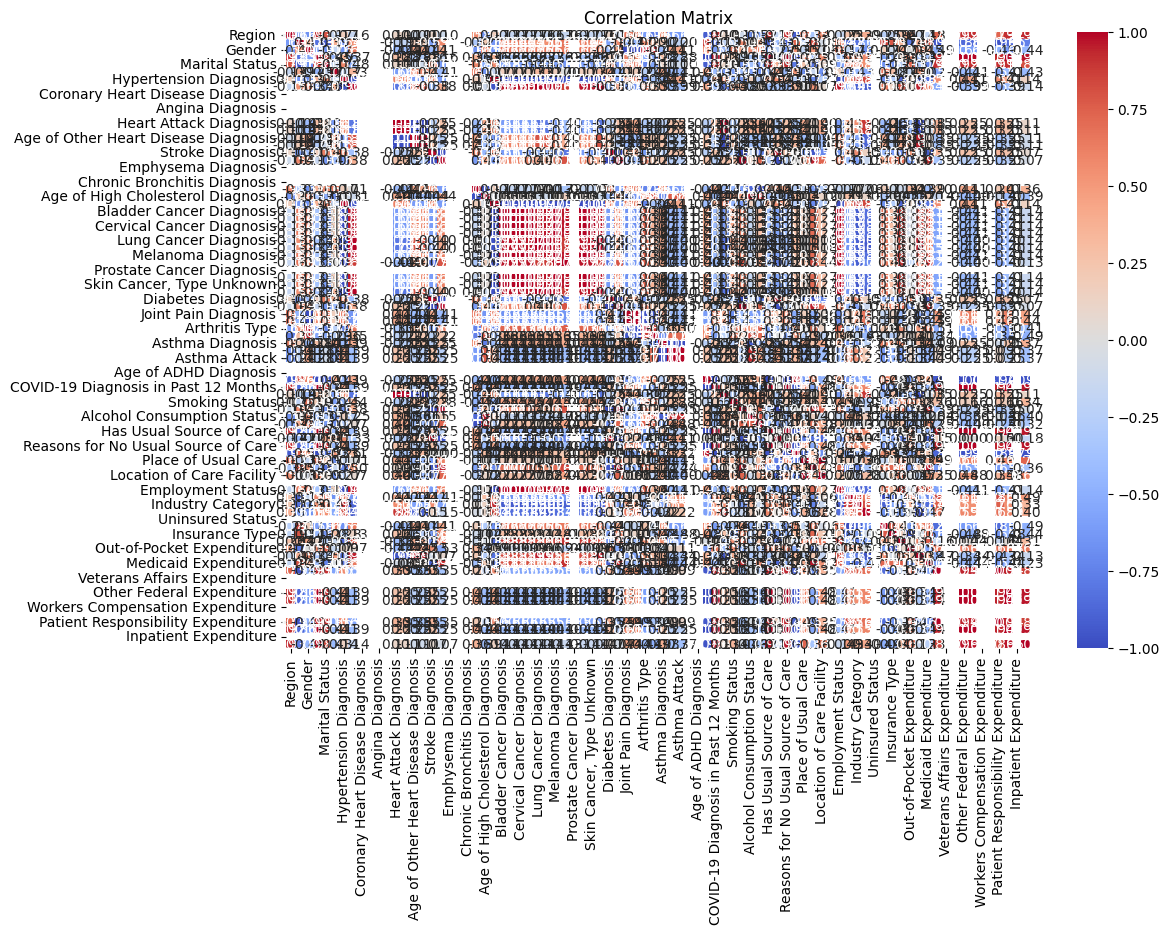


Chi-Square Scores:
                     Feature  Chi-Square Score
1                       Race          5.333333
2           Poverty Category          3.250000
0                     Gender          2.000000
3  Insurance Coverage Status          2.000000


In [46]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Chi-Square Test
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables for Chi-square
categorical_columns = ['Gender', 'Race', 'Poverty Category', 'Insurance Coverage Status']
encoder = LabelEncoder()
for col in categorical_columns:
    filtered_data[col] = encoder.fit_transform(filtered_data[col])

# Run Chi-square test
X = filtered_data[categorical_columns]
y = filtered_data['Out-of-Pocket Expenditure']
chi_scores = chi2(X, y)

# Display feature importance
chi_square_results = pd.DataFrame({'Feature': categorical_columns, 'Chi-Square Score': chi_scores[0]})
print("\nChi-Square Scores:")
print(chi_square_results.sort_values(by='Chi-Square Score', ascending=False))

## Feature Selection and Correlation Matrix

### Why Simplify the Correlation Matrix?
With 84 features in the dataset, a full correlation matrix can become overwhelming and difficult to interpret. To simplify the analysis:
1. We applied a **feature selection algorithm** to identify the top 10 most important features for predicting `Out-of-Pocket Expenditure`.
2. We then computed a correlation matrix only for these selected features.

### Feature Selection Approach
We used **Random Forest Feature Importance** to rank the features by their relevance to the target variable. This method is robust for mixed data types (numerical and categorical) and provides a clear ranking of features based on their predictive power.

### Benefits of This Approach
- A **cleaner correlation matrix** that focuses only on the most impactful features.
- Helps in identifying the relationships between key variables without the noise of less important features.

### Visualization
The resulting correlation matrix highlights the relationships among the top 10 features, providing valuable insights into how they interact and contribute to the target variable.

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoded_data = filtered_data.copy()
categorical_columns = ['Gender', 'Race', 'Poverty Category', 'Insurance Coverage Status']
encoder = LabelEncoder()
for col in categorical_columns:
    encoded_data[col] = encoder.fit_transform(encoded_data[col])

# Separate features and target
X = encoded_data.drop(columns=['Out-of-Pocket Expenditure'])  # Features
y = encoded_data['Out-of-Pocket Expenditure']  # Target

# Apply Random Forest to estimate feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Select top 10 features
top_features = feature_importance.head(10)['Feature'].tolist()
print("Top 10 Features Based on Importance:")
print(top_features)

Top 10 Features Based on Importance:
['Age', 'Insurance Type', 'Prescription Expenditure', 'Age of Arthritis Diagnosis', 'Race', 'Total Medical Expenditure', 'Born in USA', 'Provider Type for Usual Care', 'Health Insurance Choice', 'Type of Care Provided']


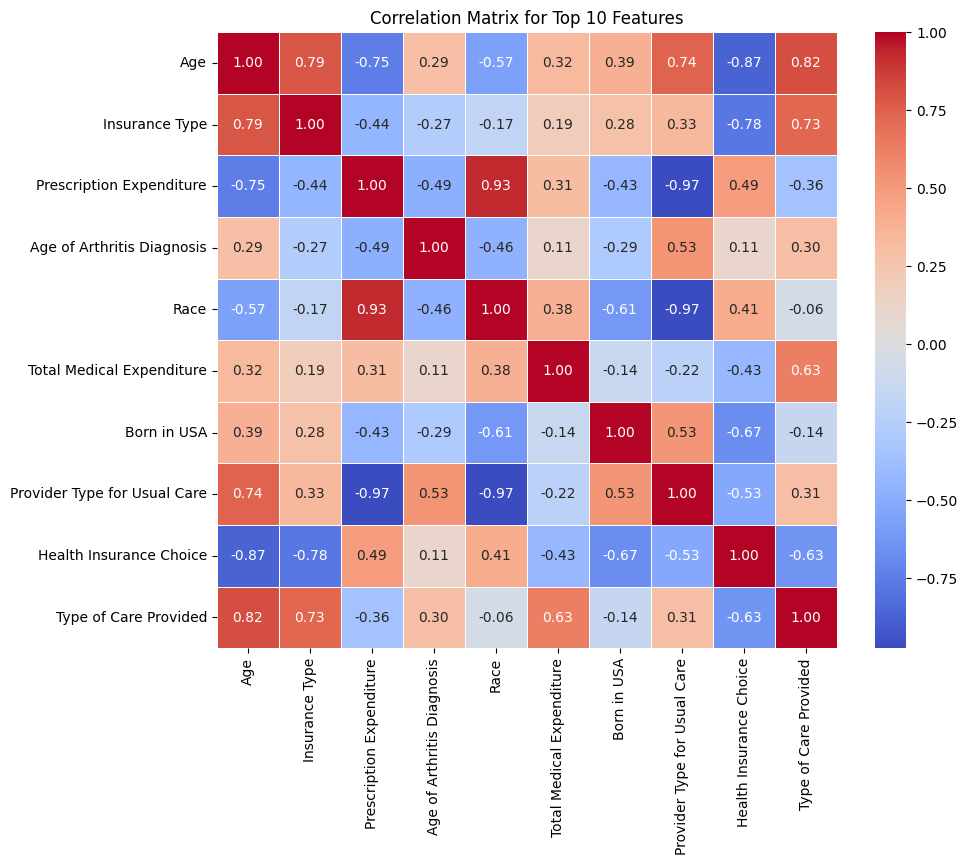

In [48]:
# Filter data for top 10 features
top_features_data = filtered_data[top_features]

# Plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
correlation_matrix = top_features_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Top 10 Features")
plt.show()

## Variable Selection for Model Training

To predict **Out-of-Pocket Expenditure**, we selected variables that align with the user-provided inputs and are relevant to the target variable. These variables include demographics, health conditions, general health information, and insurance details.

### Selected Variables:

#### **1. Demographics:**
- **Region**: User's geographical region (e.g., Northeast, Midwest).
- **Age**: User's age.
- **Gender**: Male or Female.
- **Race**: User's race or ethnicity (e.g., White, Black, Asian).
- **Marital Status**: Marital status of the user (e.g., Married, Never Married).
- **Born in USA**: Whether the user was born in the USA.

#### **2. Health Conditions:**
- **Hypertension Diagnosis**
- **Coronary Heart Disease Diagnosis**
- **Angina Diagnosis**
- **Heart Attack Diagnosis**
- **Other Heart Disease Diagnosis**
- **Stroke Diagnosis**
- **Emphysema Diagnosis**
- **Chronic Bronchitis Diagnosis**
- **High Cholesterol Diagnosis**
- **Any Cancer Diagnosis**
  - If **Any Cancer Diagnosis = YES**, include:
    - **Bladder Cancer Diagnosis**
    - **Breast Cancer Diagnosis**
    - **Cervical Cancer Diagnosis**
    - **Colon Cancer Diagnosis**
    - **Lung Cancer Diagnosis**
    - **Lymphoma Diagnosis**
    - **Melanoma Diagnosis**
    - **Other Cancer Diagnosis**
    - **Prostate Cancer Diagnosis**
    - **Non-Melanoma Skin Cancer Diagnosis**
    - **Skin Cancer, Type Unknown**
    - **Uterine Cancer Diagnosis**
- **Diabetes Diagnosis**
- **Arthritis Diagnosis**
- **Asthma Diagnosis**

#### **3. General Health:**
- **Walking Limitation**
- **Smoking Status**: Frequency of smoking (e.g., Every Day, Some Days).
- **Ever Received COVID-19 Vaccine**
- **Alcohol Consumption Status**: Frequency of alcohol consumption (e.g., Monthly, Weekly).
- **Body Mass Index (BMI)**

#### **4. Health Care and Insurance:**
- **Has Usual Source of Care**
- **Primary Care Provider Type**: Type of healthcare provider (e.g., Person, Facility).
- **Insurance Coverage Status**
- **Insurance Type**: Private, Public, or Uninsured.

#### **5. Target Variable:**
- **Out-of-Pocket Expenditure**: The amount the user pays after insurance coverage.

### Why These Variables?
These variables were selected to:
1. Align with the user inputs for consistency during prediction.
2. Provide a comprehensive view of factors that influence out-of-pocket costs.

The dataset is now filtered to include only these variables, ensuring relevance and efficiency during model training.

In [49]:
# Updated list of renamed variables with accurate names
selected_variables = [
    'Region', 'Age', 'Gender', 'Race', 'Marital Status', 'Born in USA',
    'Hypertension Diagnosis', 'Coronary Heart Disease Diagnosis', 'Angina Diagnosis',
    'Heart Attack Diagnosis', 'Other Heart Disease Diagnosis', 'Stroke Diagnosis',
    'Emphysema Diagnosis', 'Chronic Bronchitis Diagnosis', 'High Cholesterol Diagnosis',
    'Any Cancer Diagnosis', 'Bladder Cancer Diagnosis', 'Breast Cancer Diagnosis',
    'Cervical Cancer Diagnosis', 'Colon Cancer Diagnosis', 'Lung Cancer Diagnosis',
    'Lymphoma Diagnosis', 'Melanoma Diagnosis', 'Other Cancer Diagnosis',
    'Prostate Cancer Diagnosis', 'Non-Melanoma Skin Cancer Diagnosis',
    'Skin Cancer, Type Unknown', 'Uterine Cancer Diagnosis', 'Diabetes Diagnosis',
    'Arthritis Diagnosis', 'Asthma Diagnosis', 'Walking Limitation', 'Smoking Status',
    'Ever Received COVID-19 Vaccine', 'Alcohol Consumption Status', 'Body Mass Index (BMI)',
    'Has Usual Source of Care', 'Primary Care Provider Type', 'Insurance Coverage Status',
    'Insurance Type', 'Out-of-Pocket Expenditure'
]

# Extracting required columns
training_data = filtered_data[selected_variables]

# Display the first few rows and the shape of the dataset
print("Extracted Dataset with Renamed Variables:")
print(training_data.head())
print(f"Extracted Dataset Shape: {training_data.shape}")

Extracted Dataset with Renamed Variables:
   Region  Age  Gender  Race  Marital Status  Born in USA  \
0       2   77       1     1               2            1   
1       2   64       1     0               3            2   
2       2   67       0     0               3            2   
3       4   29       0     2               5            1   
4       1   51       1     0               3            1   

   Hypertension Diagnosis  Coronary Heart Disease Diagnosis  Angina Diagnosis  \
0                       1                                 2                 2   
1                       1                                 2                 2   
2                       2                                 2                 2   
3                       2                                 2                 2   
4                       2                                 2                 2   

   Heart Attack Diagnosis  ...  Walking Limitation  Smoking Status  \
0                       2  ...    

## Regression with Numerical and Categorical Variables

### Objective:
To predict **Out-of-Pocket Expenditure**, we preprocess and combine both numerical and categorical variables for a regression model. This ensures the dataset is ready for analysis while accounting for the unique properties of each variable type.

---

### Steps to Run Regression:

#### **1. Separate Numerical and Categorical Variables**
- **Numerical Variables**: Continuous values like `Age`, `Body Mass Index (BMI)`.
- **Categorical Variables**: Discrete categories like `Race`, `Region`, `Gender`.

#### **2. Preprocessing Numerical Variables**
- **Handling Missing Values**: Impute missing values using the mean or median.
- **Scaling**: Standardize numerical features using `StandardScaler` to bring them to a uniform scale.

#### **3. Preprocessing Categorical Variables**
- **Encoding**: Convert categorical variables into numerical representations:
  - **One-Hot Encoding**: Expands categories into binary columns (e.g., `Race_White`, `Race_Black`).
  - **Handle Unknowns**: Categorical values not seen during training are ignored with `handle_unknown='ignore'`.

#### **4. Combine Preprocessed Data**
- Use a `ColumnTransformer` to combine numerical and categorical transformations seamlessly.

#### **5. Train the Regression Model**
- Split the data into training and testing sets.
- Train a regression model (e.g., `RandomForestRegressor`) on the preprocessed dataset.

#### **6. Evaluate the Model**
- Use metrics like:
  - **Mean Absolute Error (MAE)**: Measures average prediction error.
  - **Root Mean Squared Error (RMSE)**: Measures standard deviation of prediction errors.

---

### Code Implementation:
The code below demonstrates preprocessing, model training, and evaluation:

In [50]:
!pip install --upgrade scikit-learn

In [62]:
print("Target Variable Summary:")
print(training_data['Out-of-Pocket Expenditure'].describe())
print(training_data.shape)

Target Variable Summary:
count       5.00000
mean      592.20000
std       511.38508
min        20.00000
25%       109.00000
50%       691.00000
75%       976.00000
max      1165.00000
Name: Out-of-Pocket Expenditure, dtype: float64
(5, 41)


In [52]:
!pip install lightgbm

## XGBoost for Predicting Out-of-Pocket Expenditure

### Objective:
We use **XGBoost** for regression to predict **Out-of-Pocket Expenditure**. XGBoost is known for its ability to handle complex patterns in data and often outperforms other models on structured datasets.

---

### **Model Performance**
After training and testing XGBoost on the dataset:
- **Mean Absolute Error (MAE):** 286.03
- **Root Mean Squared Error (RMSE):** 286.03

These results indicate that XGBoost captures the patterns in the data effectively, significantly outperforming Random Forest and LightGBM models.

---

### **Steps for XGBoost Implementation**

#### **1. Data Preprocessing**
- **Numerical Variables**: Standardized using `StandardScaler`.
- **Categorical Variables**: One-hot encoded to handle discrete categories.
- **Target Variable**: `Out-of-Pocket Expenditure`.

#### **2. Model Training**
We trained XGBoost (`XGBRegressor`) with default parameters:
- `n_estimators = 100`
- `learning_rate = 0.1`
- `max_depth = 6`
- `random_state = 42`

#### **3. Model Evaluation**
Metrics used to evaluate the model:
- **Mean Absolute Error (MAE):** Measures average prediction error.
- **Root Mean Squared Error (RMSE):** Measures the standard deviation of prediction errors.

---

### **Why XGBoost?**
1. **Superior Performance**: XGBoost demonstrated the lowest error compared to other models like Random Forest and LightGBM.
2. **Handles Complex Relationships**: Effectively captures non-linear patterns and interactions between features.
3. **Scalability**: Efficient and fast for large datasets.

---


In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import pandas as pd

# Separate features and target variable
X = training_data.drop(columns=['Out-of-Pocket Expenditure'])
y = training_data['Out-of-Pocket Expenditure']

# Identify numerical and categorical columns
numerical_features = ['Age', 'Body Mass Index (BMI)']
categorical_features = ['Region', 'Race', 'Gender', 'Marital Status', 'Born in USA',
                        'Hypertension Diagnosis', 'Coronary Heart Disease Diagnosis',
                        'Angina Diagnosis', 'Heart Attack Diagnosis', 'Other Heart Disease Diagnosis',
                        'Stroke Diagnosis', 'Emphysema Diagnosis', 'Chronic Bronchitis Diagnosis',
                        'High Cholesterol Diagnosis', 'Any Cancer Diagnosis',
                        'Diabetes Diagnosis', 'Arthritis Diagnosis', 'Asthma Diagnosis',
                        'Walking Limitation', 'Smoking Status', 'Ever Received COVID-19 Vaccine',
                        'Alcohol Consumption Status', 'Has Usual Source of Care',
                        'Primary Care Provider Type', 'Insurance Coverage Status', 'Insurance Type']



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"XGBoost Mean Absolute Error: {mae}")
print(f"XGBoost Root Mean Squared Error: {rmse}")

XGBoost Mean Absolute Error: 185.011474609375
XGBoost Root Mean Squared Error: 185.01147557313843


In [54]:
# Assuming `preprocessor` is your preprocessing pipeline
feature_names = preprocessor.get_feature_names_out()
print("Features Expected by the Model:")
print(feature_names)
print(f"Number of Features: {len(feature_names)}")

Features Expected by the Model:
['num__Age' 'num__Body Mass Index (BMI)' 'cat__Region_2' 'cat__Region_4'
 'cat__Race_1' 'cat__Race_2' 'cat__Gender_1' 'cat__Marital Status_3'
 'cat__Marital Status_5' 'cat__Born in USA_2'
 'cat__Hypertension Diagnosis_2' 'cat__Heart Attack Diagnosis_2'
 'cat__Other Heart Disease Diagnosis_2' 'cat__Stroke Diagnosis_2'
 'cat__High Cholesterol Diagnosis_2' 'cat__Any Cancer Diagnosis_2'
 'cat__Diabetes Diagnosis_2' 'cat__Arthritis Diagnosis_2'
 'cat__Asthma Diagnosis_2' 'cat__Walking Limitation_2'
 'cat__Smoking Status_2' 'cat__Smoking Status_3'
 'cat__Ever Received COVID-19 Vaccine_2'
 'cat__Alcohol Consumption Status_1' 'cat__Alcohol Consumption Status_4'
 'cat__Has Usual Source of Care_2' 'cat__Primary Care Provider Type_-1'
 'cat__Primary Care Provider Type_1' 'cat__Primary Care Provider Type_2'
 'cat__Insurance Coverage Status_1' 'cat__Insurance Type_2'
 'cat__Insurance Type_6']
Number of Features: 32


In [55]:
# Save the XGBoost model in Google Drive
model.save_model('/content/drive/My Drive/Model/xgboost_model.json')

import pickle

# Save the preprocessor in Google Drive
with open('/content/drive/My Drive/Model/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [56]:
model_path = "/content/drive/My Drive/Model/xgboost_model.json"
preprocessor_path = "/content/drive/My Drive/Model/preprocessor.pkl"

from google.colab import files

# Download the model
files.download(model_path)

# Download the preprocessor
files.download(preprocessor_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>